## Disclaimer: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Dataset description: It has 768 rows of data.

1. Pregnancies– Number of times pregnant<br>
2. Glucose– Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
3. BloodPressure– Diastolic blood pressure (mm Hg)<br>
4. SkinThickness– Triceps skinfold thickness (mm)<br>
5. Insulin- 2-Hour serum insulin (mu U/ml)<br>
6. BMI – Body mass index (weight in kg/ (height in m)^2)<br>
7. DiabetesPedigreeFunction– Diabetes pedigree function<br>
8. Age- Age (years)<br>
9. Outcome – Class variable (0 or 1) 268 of 768 are 1, the others are 0<br>

## Task: You will use the Pima Indian diabetes dataset. The dataset corresponds to a classification problem on which you need to make predictions on the basis of whether a person is to suffer diabetes given the 8 features in the dataset. You are asked to use this data to build a XGBoost Classifier model using scikit-learn. Tune the parameters using Grid Search and Randomized Search strategies.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("diabetes.csv")
df = data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

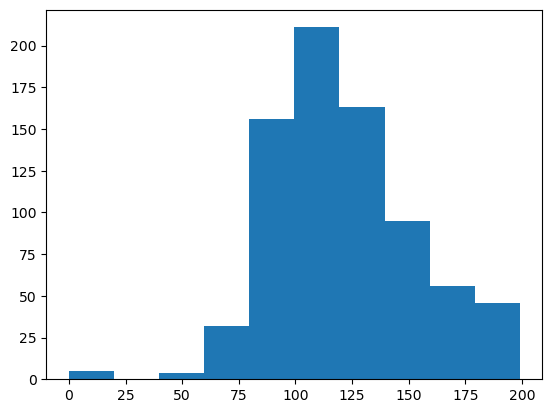

In [6]:
plt.hist(df['Glucose'])

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

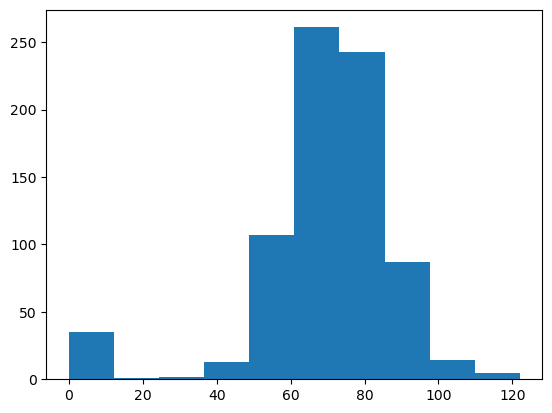

In [7]:
plt.hist(df['BloodPressure'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

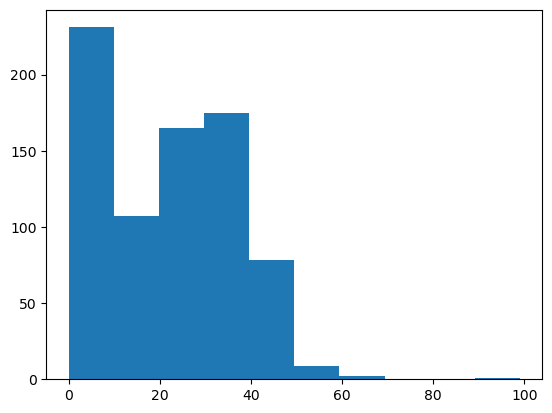

In [8]:
plt.hist(df['SkinThickness'])

In [9]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:>

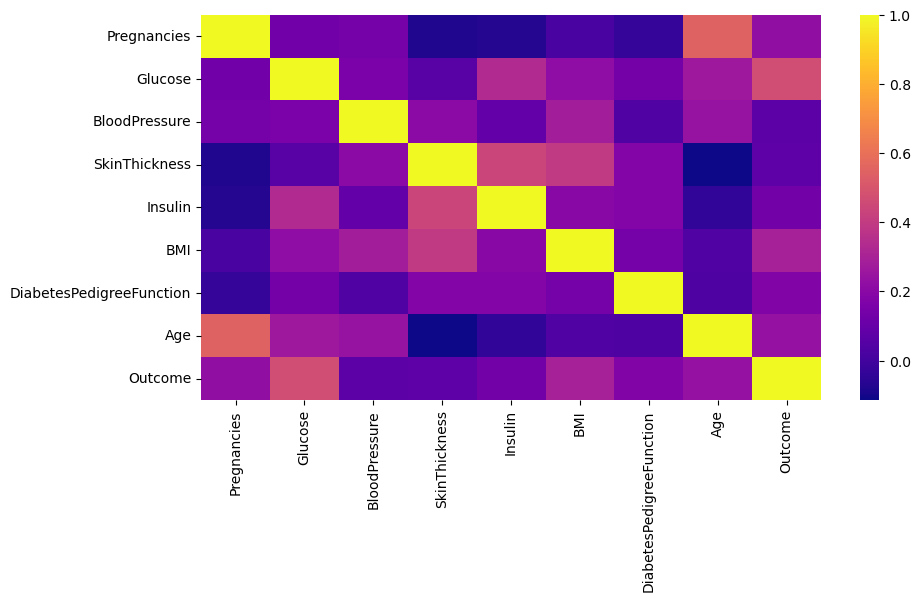

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='plasma')

Text(0.5, 1.0, "Correlations of the numerical variables to 'Outcome' feature")

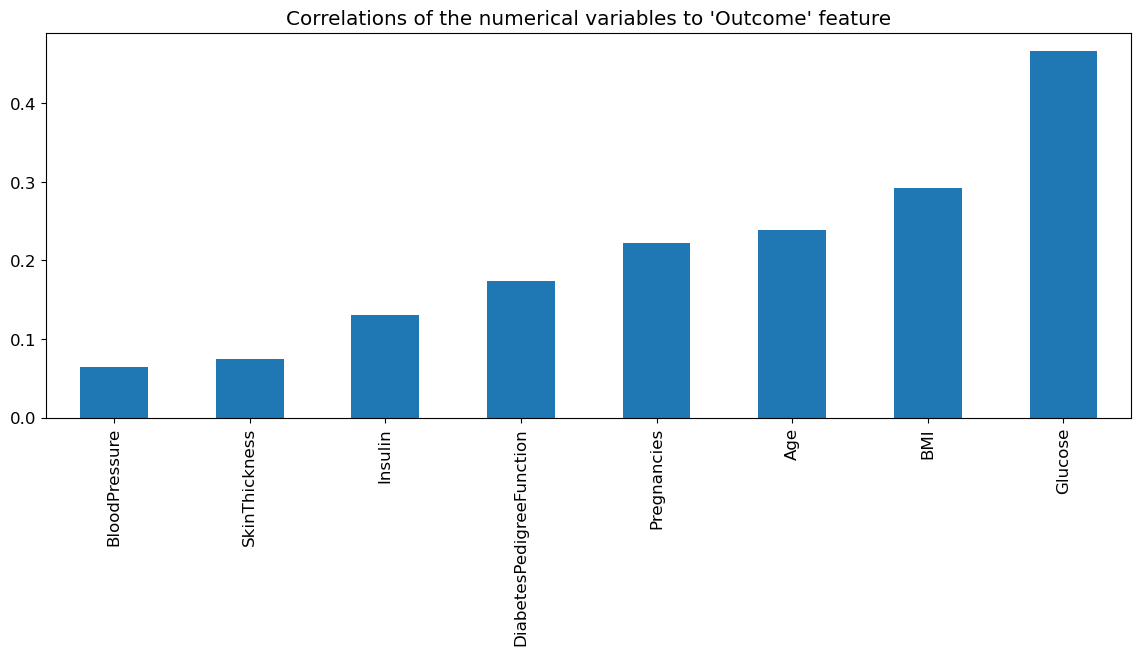

In [14]:
plt.figure(figsize=(14,5))
plt.rcParams['font.size']=12
df.corr()['Outcome'].sort_values().drop('Outcome').plot(kind='bar')
plt.title("Correlations of the numerical variables to 'Outcome' feature")

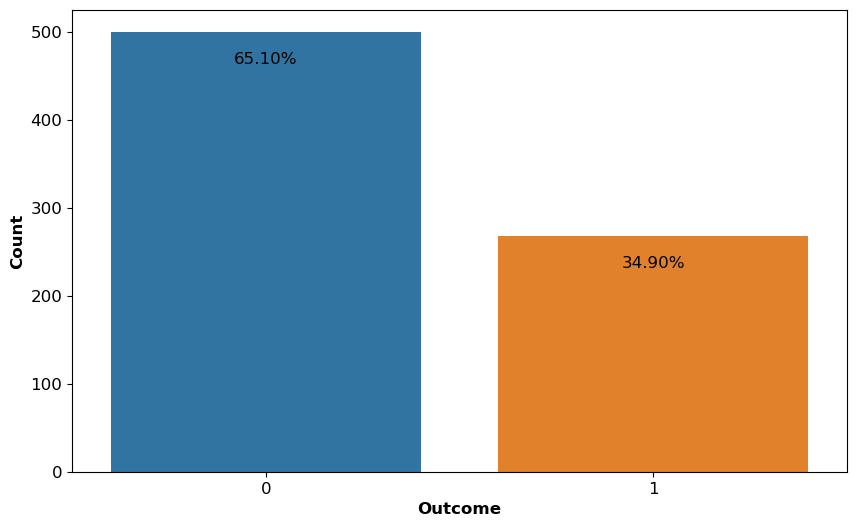

In [15]:
plt.figure(figsize=(10,6))
total = len(data['Outcome'])
count_entries=sns.countplot(x='Outcome',data=data)
plt.xlabel('Outcome',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
for p in count_entries.patches:
    count_entries.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
xgb_model = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#------------------------------------------------------------------------------------------------------------------------------#
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
#------------------------------------------------------------------------------------------------------------------------------#
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, 
                                   scoring='accuracy', cv=5, verbose=2, n_jobs=-1, random_state=42)

random_search.fit(X_train_scaled, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test_scaled)
accuracy_grid = accuracy_score(y_test, y_pred_grid)

best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test_scaled)
accuracy_random = accuracy_score(y_test, y_pred_random)
#------------------------------------------------------------------------------------------------------------------------------#

print("\n\033[1mGrid Search:\033[0m")
print("\nBest Parameters:", best_params_grid)
print("\033[1mBest Accuracy:\033[0m", best_score_grid)
print("\033[1mTest Accuracy:\033[0m", accuracy_grid)
print(classification_report(y_test, y_pred_grid))
print("***********************************************************************************************************************")
print("\n\033[1mRandomized Search:\033[0m")
print("\nBest Parameters:", best_params_random)
print("\033[1mBest Accuracy:\033[0m", best_score_random)
print("\033[1mTest Accuracy:\033[0m", accuracy_random)
print(classification_report(y_test, y_pred_random))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Grid Search:

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy: 0.7850459816073571
Test Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

***********************************************************************************************************************

Randomized Search:

Best Parameters: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Accuracy: 0.7850459816073571
Test Accuracy: 0.7597402597402597
              pr